In [42]:

import pandas as pd

df = pd.read_csv("customer_purchases.csv")
df.head()

,customer_id,age,country,monthly_spending,subscription_length_months,support_tickets,churn_status
0,1,22,US,12,1,0,0
1,2,25,US,15,2,1,0
2,3,27,US,18,3,0,0
3,4,29,CA,22,2,2,1
4,5,30,CA,25,1,1,0


In [43]:
## Boss Question #1: Basic Data Exploration
## “Can you give me a quick statistical summary of the numerical columns?

df.describe()

,customer_id,age,monthly_spending,subscription_length_months,support_tickets,churn_status
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,15.500000,32.633333,28.133333,3.966667,1.500000,0.400000
std,8.803408,7.993460,14.170716,2.894505,1.737021,0.498273
min,1.000000,22.000000,10.000000,1.000000,0.000000,0.000000
25%,8.250000,27.000000,18.250000,2.000000,0.000000,0.000000
50%,15.500000,31.000000,26.500000,3.000000,1.000000,0.000000
75%,22.750000,36.750000,33.750000,5.750000,2.750000,1.000000
max,30.000000,55.000000,75.000000,12.000000,6.000000,1.000000


In [44]:
print(f"The average customer age is {df.age.mean()}.\nThe average monthly spending is {df.monthly_spending.mean()}.\n")
if df.monthly_spending.max() > df.monthly_spending.mean():
    print(f"Spending is skewed to the right, because:\nMean:{df.monthly_spending.mean()}\nMax:{df.monthly_spending.max()}\nmax>>mean\nwhich follows a log-normal distribution, common in spending data.")

The average customer age is 32.63333333333333.
The average monthly spending is 28.133333333333333.

Spending is skewed to the right, because:
Mean:28.133333333333333
Max:75
max>>mean
which follows a log-normal distribution, common in spending data.


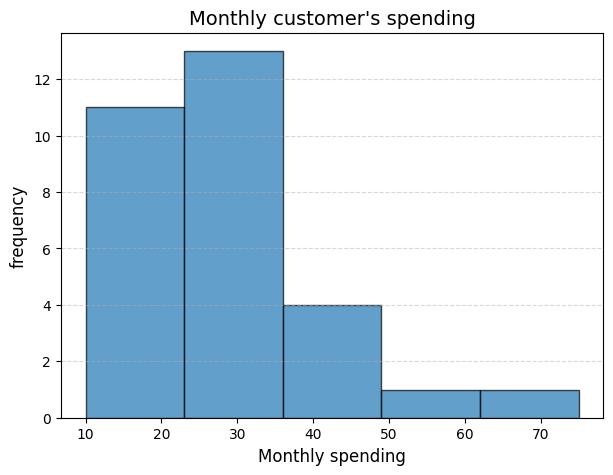

In [45]:
## Boss Question #2
"""Great. Can you show me a histogram of monthly spending, and a boxplot, 
so I can visually understand the distribution and outliers?"""

import matplotlib.pyplot as plt 

plt.figure(figsize=(7,5))
plt.hist(df.monthly_spending,bins=5,edgecolor='black',alpha=0.7)
plt.xlabel("Monthly spending",fontsize=12)
plt.ylabel("frequency",fontsize=12)
plt.title("Monthly customer's spending",fontsize=14)
plt.grid(axis='y',alpha=0.5,linestyle='--')

plt.show()

In [46]:
import numpy as np 

Q1 = np.percentile(df.monthly_spending,25)
Q3 = np.percentile(df.monthly_spending,75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

iqr_outliers = [x for x in df.monthly_spending if x < lower_bound or x > upper_bound]

print(f"It can be seen these outliers{iqr_outliers}\nLower boun: {lower_bound}\nUpper bound: {upper_bound}")

It can be seen these outliers[60, 75]
Lower boun: -5.0
Upper bound: 57.0


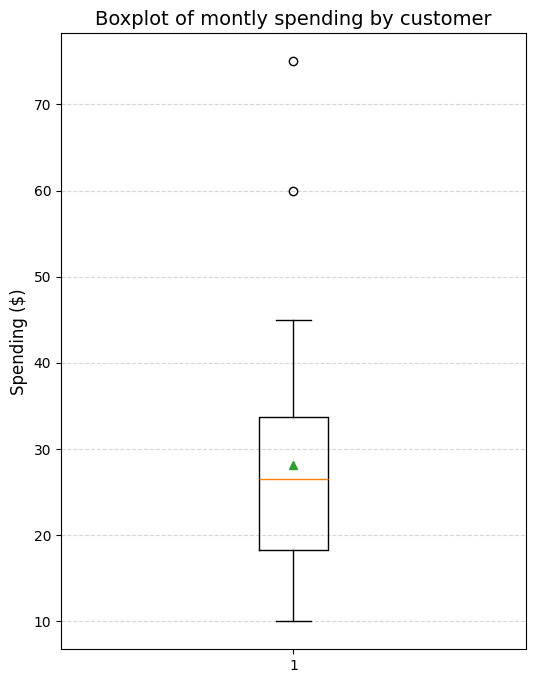

In [47]:
plt.figure(figsize=(6,8))
plt.boxplot(df.monthly_spending,vert=True,showmeans=True)
plt.title("Boxplot of montly spending by customer",fontsize=14)
plt.ylabel("Spending ($)",fontsize=12)
plt.grid(axis='y',linestyle="--",alpha=0.5)

plt.show()

In [48]:
## Boss question #4

"""Great work. Can you analyze whether customers who churn 
tend to spend less or more compared to customers who stay?"""

print(df.groupby("churn_status")["monthly_spending"].mean())



churn_status
0    24.388889
1    33.750000
Name: monthly_spending, dtype: float64


Boss, the data shows that customers who churn spend an average of $33.75,
which is significantly higher than the $24.38 spent by customers who stay.
This suggests that churned users behave like short-term, high-intensity users rather than long-term subscribers.
These users may complete their goals quickly or see less long-term value, even though they spend more initially.

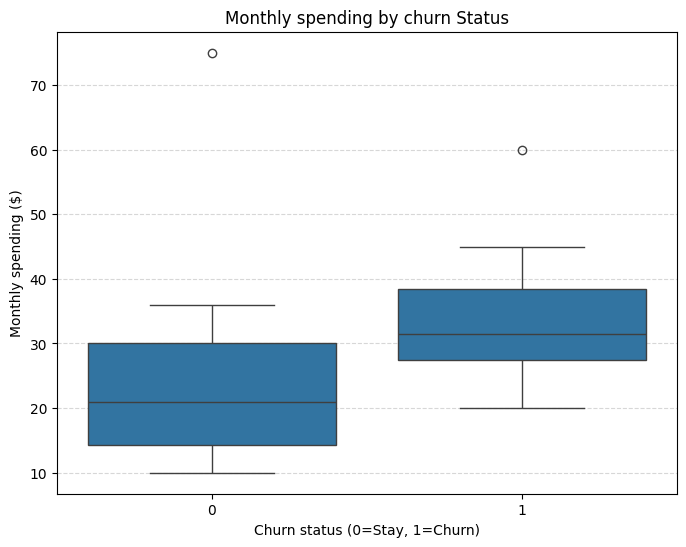

In [49]:
## Boss question #5

"""Interesting. Can you visualize this difference for me?
Please create a boxplot comparing spending between churned and non-churned customers."""

import seaborn as sns

plt.figure(figsize=(8,6))
sns.boxplot(data=df,x="churn_status",y="monthly_spending")
plt.title("Monthly spending by churn Status")
plt.xlabel("Churn status (0=Stay, 1=Churn)")
plt.ylabel("Monthly spending ($)")
plt.grid(axis='y',linestyle="--",alpha=0.5)
plt.show()

“Churned customers tend to spend more, but their spending is less variable.”

- They cluster around $30–$40

- They include one outlier at $60

- This suggests focused, short-term, intense usage

“Customers who stay have more diverse spending behaviors.”

- Their spending ranges widely (~$10 to $40)

- They include a major outlier at $75

- This shows that both low- and high-spending users can remain loyal

“High spending does not guarantee churn or retention.”

- We see high spenders in both groups

- Therefore spending is not a strong predictor of churn alone

- We must consider other variables (tickets, subscription length, age, country)

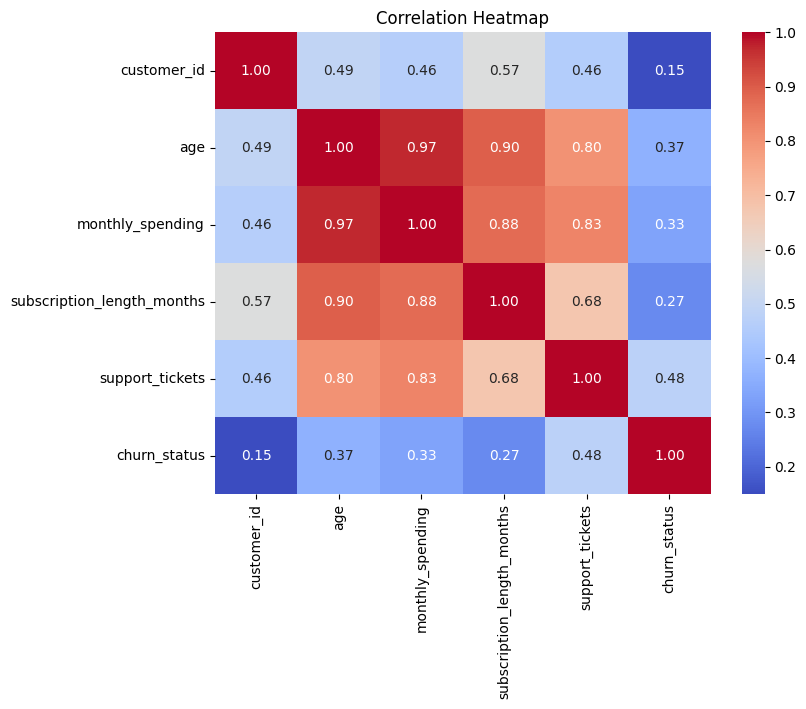

In [53]:
## Boss Question #6

"""“Can you show me a correlation heatmap so I can see how monthly 
spending relates to age, subscription length, churn, and support tickets?”"""

numeric_df = df.select_dtypes(include=["number"])
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(),annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

The strongest driver of churn is support tickets (0.48). Customers who generate many support tickets are much more likely to leave.

Age (0.37) and monthly spending (0.33) show only weak–moderate correlation with churn.

Subscription length (0.27) shows a weak correlation, meaning long-term customers are only slightly less likely to churn.

The heatmap shows that churn is primarily associated with support tickets. The more support tickets a user submits, the more likely they are to churn. Spending and age have only weak–moderate relationships with churn, meaning behavior and customer experience matter more than demographics or revenue.